In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from icecream import ic
import seaborn as sns

In [6]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [101]:
train_data=pd.read_csv("D:/HALDEN/downloads/train.csv")
ic(train_data.shape)
train_data.head(10)

ic| train_data.shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [103]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [104]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [105]:
train_data['Age'].fillna(train_data['Age'].median(),inplace=True  )

In [106]:
train_data.dropna(inplace=True)

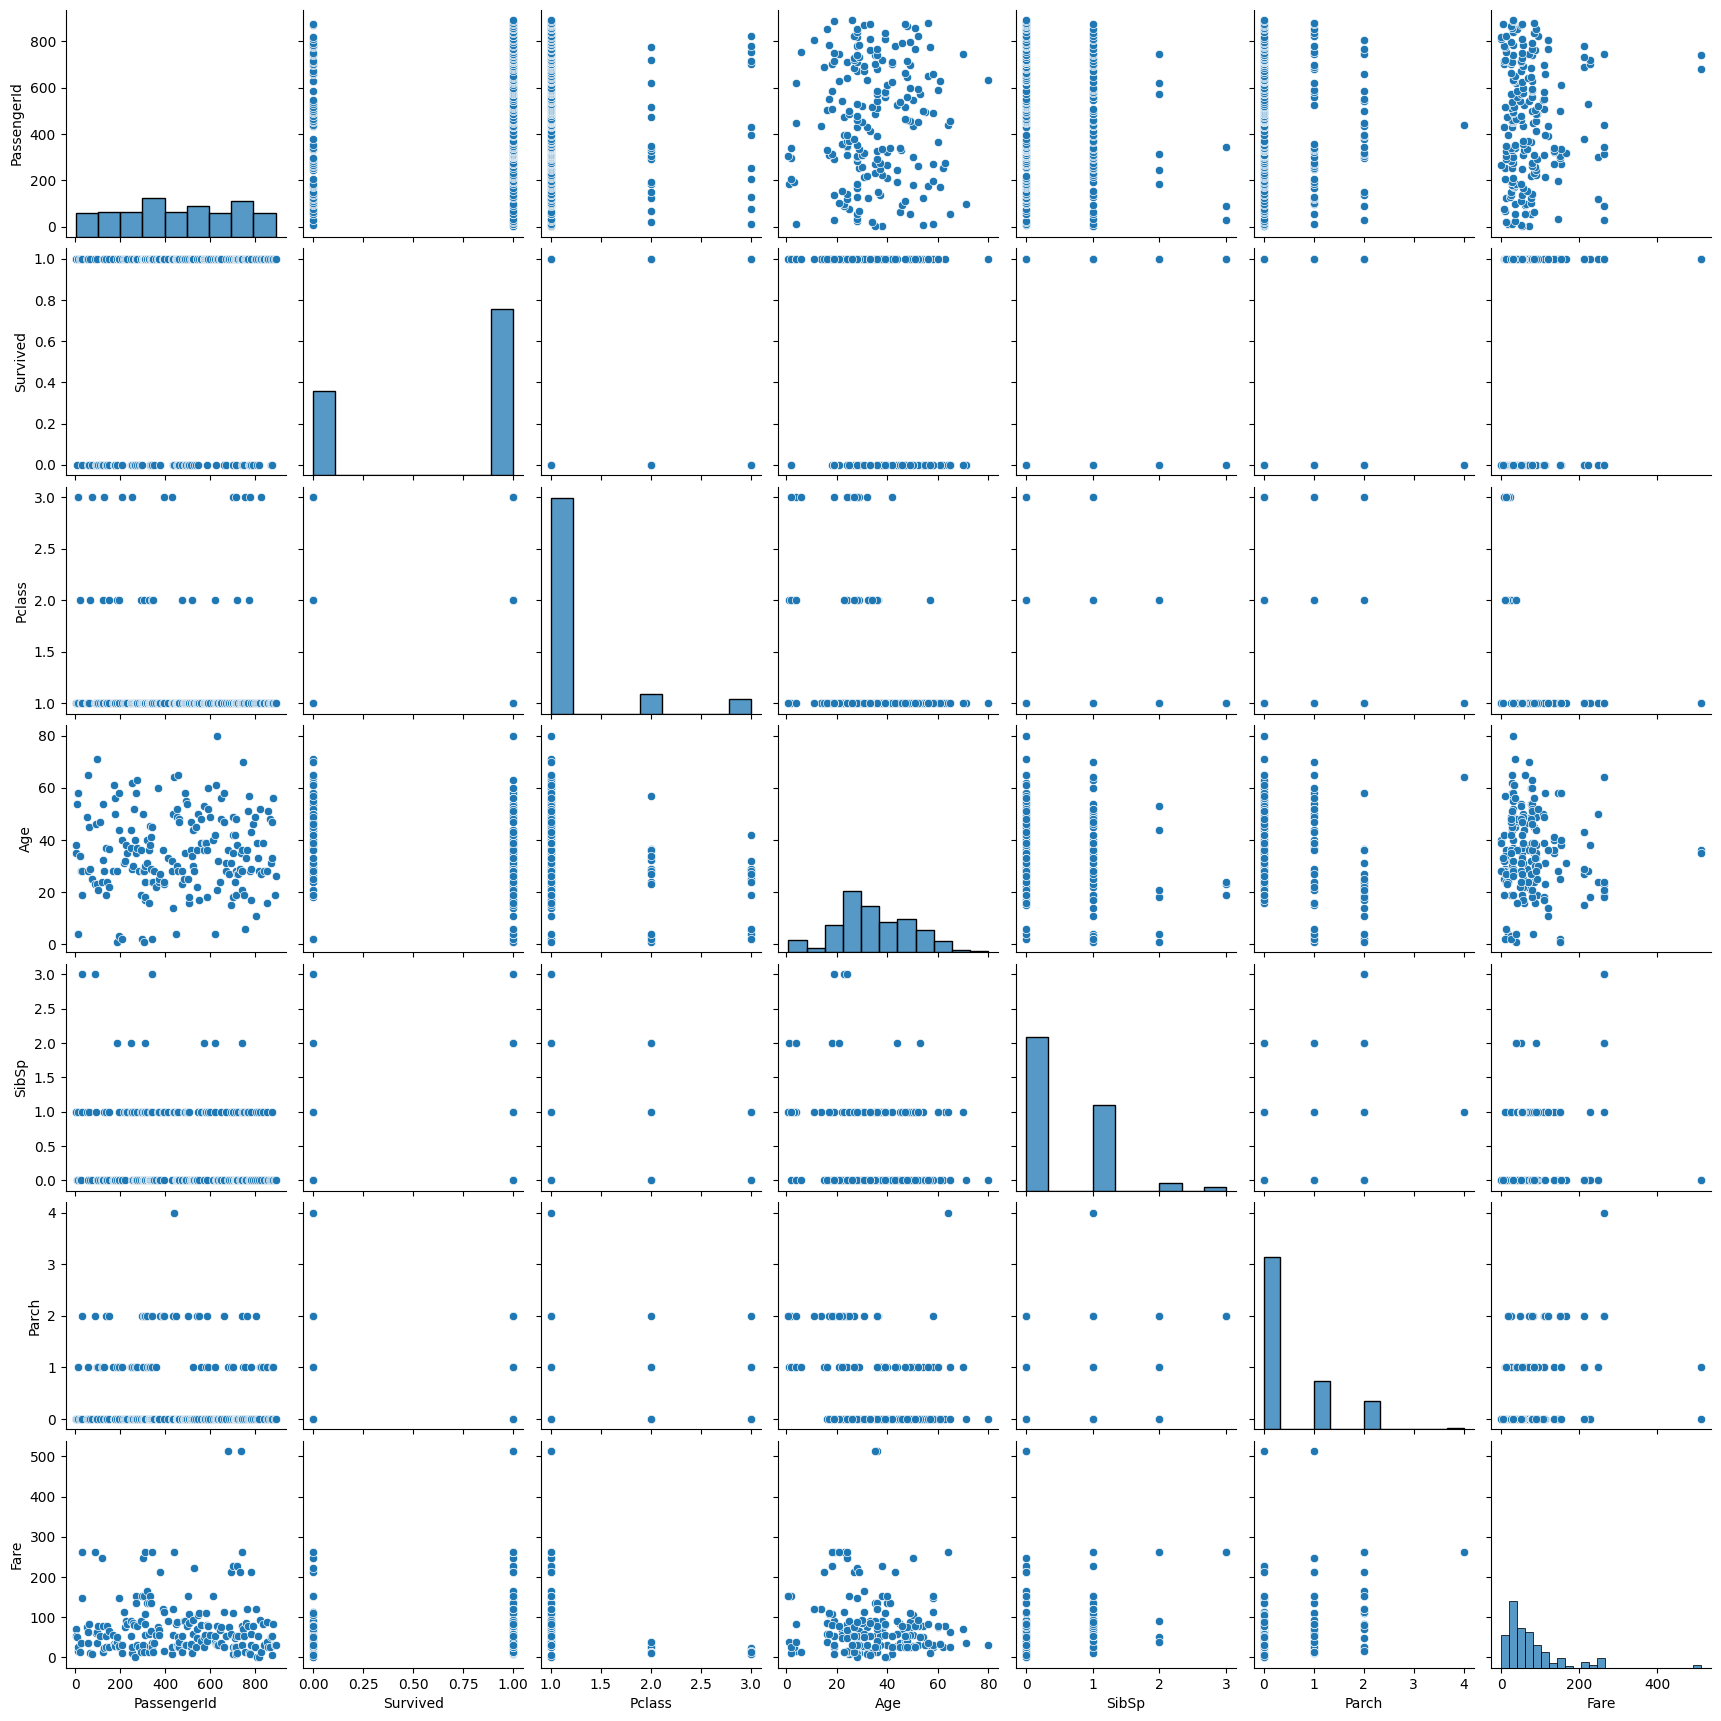

In [21]:
sns.pairplot(train_data)

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [108]:
encoder=OneHotEncoder(sparse=False)

In [109]:
encoded=encoder.fit_transform(train_data[['Sex','Embarked']])

C:\Users\HALDEN\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [110]:
df_encoded = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['Sex', 'Embarked']))

In [111]:
df_encoded

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
197,1.0,0.0,0.0,0.0,1.0
198,0.0,1.0,0.0,0.0,1.0
199,1.0,0.0,1.0,0.0,0.0
200,1.0,0.0,0.0,0.0,1.0


In [112]:
train_data['Sex_female']=df_encoded['Sex_female']

In [113]:
train_data['Sex_male']=df_encoded['Sex_male']

In [120]:
train_data['Embarked_C']=df_encoded['Embarked_C']

In [121]:
train_data['Embarked_Q']=df_encoded['Embarked_Q']

In [122]:
train_data['Embarked_S']=df_encoded['Embarked_S']

In [123]:
train_data['Sex_female'].fillna(train_data['Sex_female'].median(),inplace=True  )

In [124]:
train_data['Sex_male'].fillna(train_data['Sex_male'].median(),inplace=True  )

In [125]:
train_data['Embarked_Q'].fillna(train_data['Embarked_Q'].median(),inplace=True  )

In [126]:
train_data['Embarked_C'].fillna(train_data['Embarked_C'].median(),inplace=True  )

In [127]:
train_data['Embarked_S'].fillna(train_data['Embarked_S'].median(),inplace=True  )

In [128]:
train_data.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin             0
Embarked          0
Sex_female        0
Sex_male          0
Embarked_C\t    163
Embarked_Q        0
Embarked_S        0
Embarked_C        0
dtype: int64

In [129]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male,Embarked_C\t,Embarked_Q,Embarked_S,Embarked_C
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1.0,0.0,0.0,0.0,1.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1.0,0.0,0.0,0.0,1.0,0.0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0.0,1.0,0.0,0.0,1.0,0.0
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S,0.0,1.0,1.0,0.0,0.0,1.0
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S,0.0,1.0,NaN,0.0,1.0,0.0
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S,0.0,1.0,NaN,0.0,1.0,0.0
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C,0.0,1.0,NaN,0.0,1.0,0.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0.0,1.0,NaN,0.0,1.0,0.0


In [139]:
x=train_data[['Age','SibSp','Parch','Pclass','Sex_female','Sex_male','Embarked_Q','Embarked_S','Embarked_C']].values

In [140]:
y=train_data['Survived'].values

In [141]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [142]:
x_train.shape

(141, 9)

In [143]:
y_train.shape

(141,)

In [144]:
y_test.shape

(61,)

In [145]:
from sklearn.preprocessing import MinMaxScaler

In [146]:
scaler=MinMaxScaler()

In [147]:
scaler.fit(x_train)

MinMaxScaler()

In [148]:
x_train=scaler.transform(x_train)

In [149]:
x_test=scaler.transform(x_test)

In [150]:
x_train

array([[0.72888128, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.85730594, 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.62899543, 0.33333333, 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.38641553, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.60045662, 0.        , 0.5       , ..., 0.        , 1.        ,
        0.        ],
       [0.67180365, 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ]])

In [151]:
x_train.max()

1.0000000000000002

In [152]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [153]:
model=Sequential([Dense(4,activation='relu'),
                  Dense(2,activation='relu'),
                  Dense(1)])

In [154]:
model.compile(optimizer='rmsprop',loss='mse')

In [155]:
model.fit(x=x_train,y=y_train,epochs=250)

Epoch 1/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.6109
Epoch 2/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5845 
Epoch 3/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5719 
Epoch 4/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5589 
Epoch 5/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5172 
Epoch 6/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5186 
Epoch 7/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.5019 
Epoch 8/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4810 
Epoch 9/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4729 
Epoch 10/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4535 
Epoch 11/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4685 
Epoch 12/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4390 
Epoch 13/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4553 
Epoch 14/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4357 
Epoch 15/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.3799 
Epoch 16/250
5/5 ━━━

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2313 
Epoch 84/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2375 
Epoch 85/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2341 
Epoch 86/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2400 
Epoch 87/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2364 
Epoch 88/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2385 
Epoch 89/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2380 
Epoch 90/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2417 
Epoch 91/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2437 
Epoch 92/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2397 
Epoch 93/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2307 
Epoch 94/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2304 
Epoch 95/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2451 
Epoch 96/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2397 
Epoch 97/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2284 
Epoch 98/250
5/5 ━━━━━━

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2347 
Epoch 165/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2302 
Epoch 166/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2384 
Epoch 167/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2335 
Epoch 168/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2320 
Epoch 169/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2326 
Epoch 170/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2277 
Epoch 171/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2416 
Epoch 172/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2406 
Epoch 173/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2313 
Epoch 174/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2379 
Epoch 175/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2320 
Epoch 176/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2267 
Epoch 177/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2318  
Epoch 178/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.2370 
Epoch 17

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2365 
Epoch 246/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2289 
Epoch 247/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2252 
Epoch 248/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2335 
Epoch 249/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2348 
Epoch 250/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2258 


In [156]:
loss_df=pd.DataFrame(model.history.history)

<AxesSubplot:>

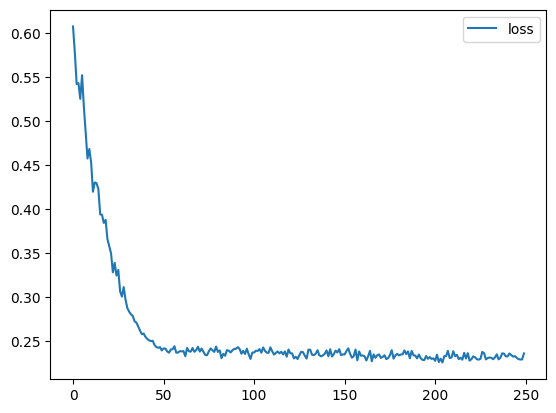

In [157]:
loss_df.plot()

In [158]:
model.evaluate(x_test,y_test,verbose=0) 

0.20074410736560822

In [159]:
model.evaluate(x_train,y_train,verbose=0)

0.22879795730113983

In [160]:
test_prediction=model.predict(x_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


In [161]:

test_pred=pd.Series(test_prediction.reshape(61,))


In [162]:
pred_df=pd.DataFrame(y_test,columns=['Test True Y'])

In [163]:
pred_df=pd.concat([pred_df,test_pred],axis=1)

In [164]:
pred_df.cols=['test true Y',"Model Predictions"]

C:\Users\HALDEN\AppData\Local\Temp\ipykernel_21540\3862055416.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  pred_df.cols=['test true Y',"Model Predictions"]


In [165]:
pred_df.columns=['Test True Y', "Model Predictions"]


In [166]:
pred_df

,Test True Y,Model Predictions
0,0,0.594493
1,1,0.594493
2,1,0.594493
3,1,0.594493
4,1,0.594493
...,...,...
56,1,0.594493
57,0,0.594493
58,1,0.594493
59,1,0.594493


In [167]:
from sklearn.metrics import roc_curve,roc_auc_score

In [168]:
# Create a Perceptron classifier
mdlPercept = Perceptron()
# Train the classifier
mdlPercept.fit(x_train, y_train)
# Make predictions on the test set
y_pred = mdlPercept.predict(x_test)
# Calculate accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
#Generate the Confusion Matrix
print("Perceptron Confusion Matrix:\n",confusion_matrix(y_test, y_pred))

Accuracy: 0.7704918032786885
Perceptron Confusion Matrix:
 [[ 0 13]
 [ 1 47]]


In [169]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [170]:
auc_score = roc_auc_score(y_test, y_pred)

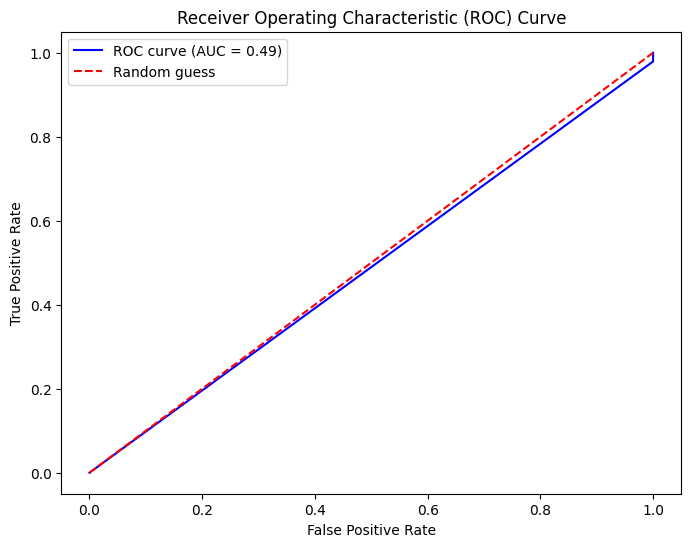

In [171]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()

In [172]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [173]:
mean_absolute_error(pred_df["Test True Y"],pred_df['Model Predictions'])

0.4396848483163802

now we can predict based on new